# **ALGORITMA KMEANS**

**DZAKY RAIHAN AHMAD**

**1301204316**

In [107]:
#untuk read data
import math
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random as rd
#Untuk Mencari Elbow SAJA
from sklearn.cluster import KMeans

SUMBER : 

https://www.kaggle.com/code/warungsederhana/clustering-unsupervised-learning-on-country-data

https://www.kaggle.com/code/sarfarazjamal/sarfarazjamal17093assignment2

https://www.kaggle.com/code/abdulhaq786/simple-and-easy-step-by-step-explanation-kmeans

# **PEMAHAMAN DATA**

Country Data merupakan dataset dari banyak negara yang memiliki beberapa fitur. Nantinya tiap negara akan dicluster berdasarkan tingkat kesejahteraannya. Apakah negara tersebut tidak perlu dibantu, mungkin perlu dibantu, atau sangat perlu dibantu. Berikut fitur yang terdapat pada dataset:

country : Nama negara

child_mort : kematian anak kecil dibawah 5 tahun per 1000 kelahiran

exports : eksport barang dan jasa perkapita. Dalam bentuk persentase dari GDP per kapita

health : total belanja kesehatan per kapita. Dalam bentuk persentase dari GDP per kapita

imports : import barang dan jasa perkapita. Dalam bentuk persentase dari GDP per kapita

Income : Net pendapatan per orang

Inflation : Pengukuran tingkat pertumbuhan tahunan Total GDP

life_expec : Rata-rata jumlah tahun seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama

total_fer : Jumlah anak yang akan dilahirkan oleh setiap wanita jika tingkat kesuburan usia saat ini tetap sama.

gdpp : GDP per kapita. Dihitung sebagai Total GPD dibagi dengan total populasi.

# **BACA DATA**

Menyimpan pembacaan dataset learning on country kedalam variabel data

In [108]:
#BACA DATA
data = pd.read_csv('Country-data.csv')
#tampung = pd.read_csv("Country-data.csv", header = None)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [109]:
data_country = pd.DataFrame(data['country'])

In [110]:
country_dict = data_country.to_dict()['country']

Mengetahui berapa jumlah baris dan kolom yang ada dari suatu dataset yang akan kita olah, pada contoh ini dataset learning on country memiliki 167 baris dan 10 fitur (kolom)

In [111]:
data.shape

(167, 10)

Mengetahui fitur apa saja yang ada dalam suatu dataset serta memberikan informasi ada tidaknya data yang kosong pada tiap kolomnya. Hal ini sangat penting karena data yang kosong tidak bisa diolah dan harus dihapus dari dataset. dataset.info() juga memberikan informasi tipe data apa yang dimiliki dari tiap fitur pada suatu dataset yang diolah

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Menampilkan berapa jumlah baris / data yang memiliki nilai yang berbeda / unique

In [113]:
data.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

Mengetahui nilai statistika dari suatu dataset. Nilai ini meliputi count, mean, std, min, kuartil-I, kuartil-II, kuartil-III, dan terakhir kuartil-IV dari suatu dataset

In [114]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


CEK NILAI NULL

In [115]:
check_null = data.isnull().sum() #cek jumlah nilai null di tiap kolom
print(check_null)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


CEK BARIS DUPLIKAT

In [116]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) #menampilkan jumlah baris yang duplikat


Number of duplicate rows = 0


# **PLOT**

<function matplotlib.pyplot.show(*args, **kw)>

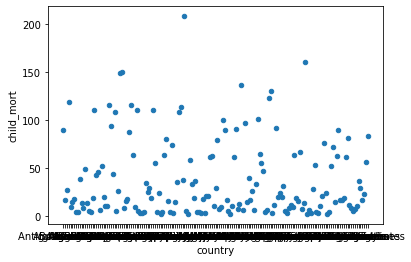

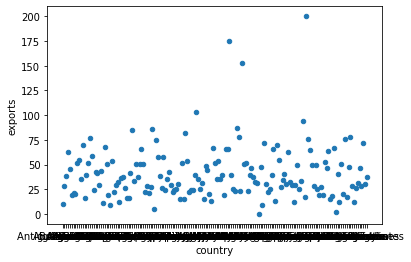

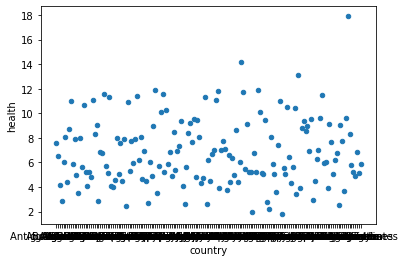

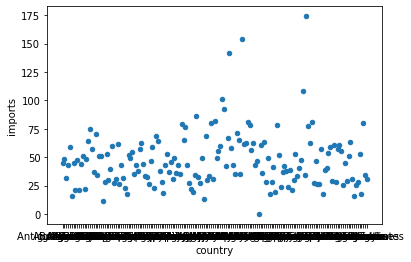

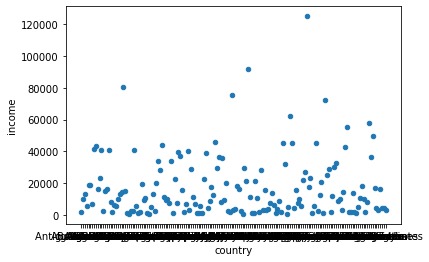

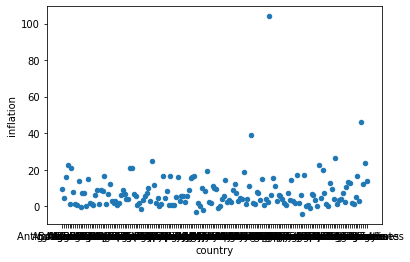

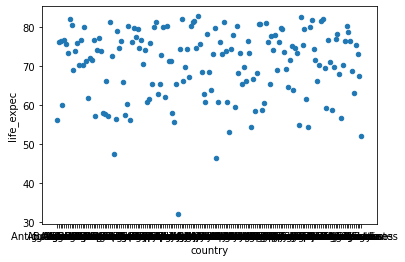

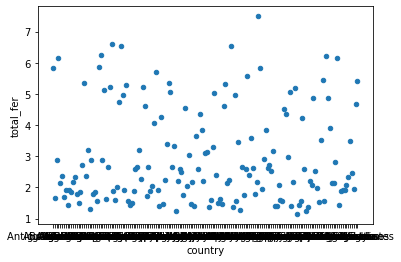

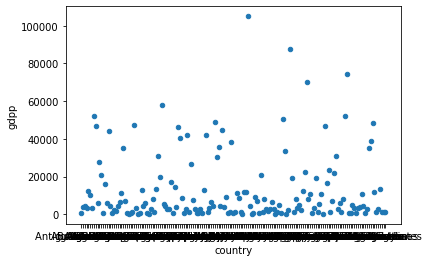

In [117]:
data.plot.scatter(x='country', y = 'child_mort')
data.plot.scatter(x='country', y = 'exports')
data.plot.scatter(x='country', y = 'health')
data.plot.scatter(x='country', y = 'imports')
data.plot.scatter(x='country', y = 'income')
data.plot.scatter(x='country', y = 'inflation')
data.plot.scatter(x='country', y = 'life_expec')
data.plot.scatter(x='country', y = 'total_fer')
data.plot.scatter(x='country', y = 'gdpp')
plt.show

HEATMAP untuk menampilkan koordinat dari masing-masing data yang ada di dataset

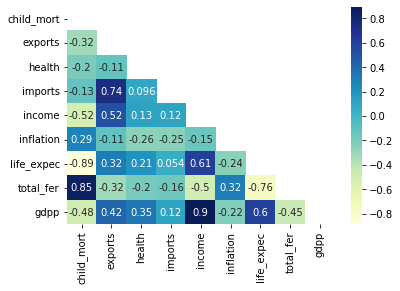

In [118]:
ax = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=np.triu(data.corr()))

# **PRE PROCESSING**

Memilih atribut dengan korelasi yang tinggi yakni child_mort dan total_fer

In [119]:
data_pakai = data[['child_mort', 'total_fer']]
data_pakai.head()

,child_mort,total_fer
0,90.2,5.82
1,16.6,1.65
2,27.3,2.89
3,119.0,6.16
4,10.3,2.13


# **HANDLING OUTLIERS**

In [120]:
# calculate interquartile range
'''Metode ini menggunakan nilai quartil 1,2 dan 3 yang akan membagi sebuah urutan
data menjadi empat bagian. Data-data pencilan dapat ditentukan dengan nilai yang kurang
dari 1.5*IQR (selisih antara quartil 1 dan quartil 3) terhadap quartil 1,
dan nilai yang lebih dari 1.5*IQR terhadap quartil 3'''
def handlingOutliers(data):
  for i in data:
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1 #range q3 - q1
    maximum = q3 + (1.5 *iqr)
    minimum = q1 - (1.5 *iqr)
    if i < minimum or i > maximum:
      data = data.replace(i, np.mean(data))
  return data

In [121]:
data_fix = pd.DataFrame(columns = [0,1])
data_fix[0] = handlingOutliers(data['child_mort'])
data_fix[1] = handlingOutliers(data['total_fer'])
data_fix.head()

,0,1
0,90.2,5.82
1,16.6,1.65
2,27.3,2.89
3,119.0,6.16
4,10.3,2.13


# **NORMALISASI**

In [122]:
def normalize(data):
  return (data - data.min())/(data.max() - data.min())

data_normalize = normalize(data_fix)
data_normalize = pd.DataFrame(data_normalize)
data_normalize.head()

,0,1
0,0.727575,0.858456
1,0.116279,0.091912
2,0.205150,0.319853
3,0.966777,0.920956
4,0.063953,0.180147


# **ELBOW**

In [123]:
data_elbow = data_normalize[[0, 1]]

In [124]:
wcss = []
K = range(1,11)
for i in range(1, 11):
    latih = KMeans(n_clusters=i, init='k-means++', random_state=30)
    latih.fit(data_elbow)
    wcss.append(latih.inertia_)

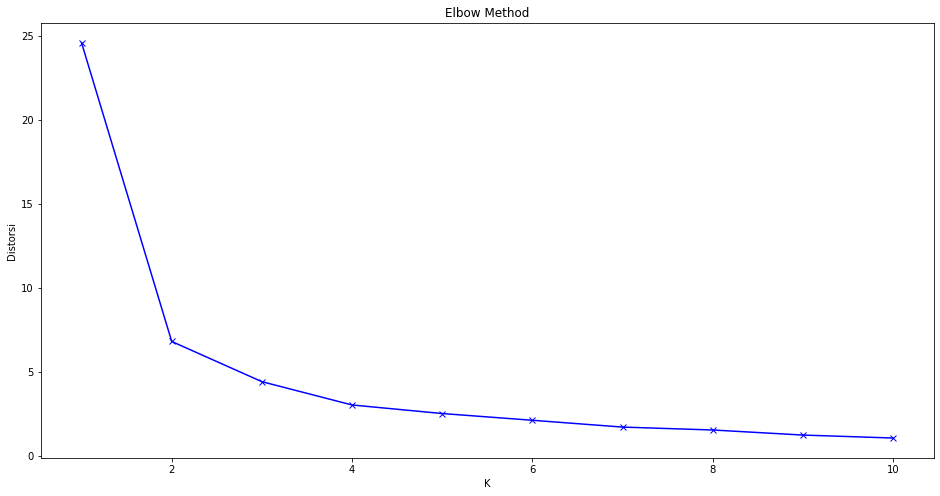

In [125]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Distorsi')
plt.show()

# **KMEANS**

In [126]:
def scatter(df, centroids, i):
    plt.subplots(figsize=(8,8))
    plt.scatter(x = df[0], y = df[1], c = df['Cluster'], cmap = 'Accent')
    plt.title('Iterasi {}'.format(i+1))
    for i in range(centroids.shape[0]):
        plt.scatter(centroids.iloc[i][0], centroids.iloc[i][1], color='yellow', marker = 'X')
    plt.show()

In [127]:
def euclidean(centroid, data):
    hasil = []
    for i in range(centroid.shape[0]):
        euc = math.sqrt((data[0]-centroid.iloc[i][0])**2 + (data[1]-centroid.iloc[i][1])**2)
        hasil.append(euc)
    return hasil

In [128]:
def randomcentroid(k, random):
    np.random.seed(random)
    c = []
    for _ in range(k):
        r1 = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        c.append([r1, r2])
    return pd.DataFrame(c)

In [129]:
def clustering(df, centroids):
    clusters = []
    for i in range(df.shape[0]):
        euc = euclidean(centroids, df.iloc[i])
        minimum = min(euc)
        for j in range(len(euc)):
            if minimum == euc[j]:
                cluster = j
        clusters.append(cluster)
    return pd.DataFrame(clusters)

In [130]:
def centroidbaru(df, k):
    c = []
    clust1 = df.groupby('Cluster')[0].mean()
    clust2 = df.groupby('Cluster')[1].mean()
    for i in range(k):
        c.append([clust1[i], clust2[i]])
    return pd.DataFrame(c)

In [131]:
def kmeans(df, centroid, k, nmax):
    i = 0
    centroidlama = pd.DataFrame()
    while i < nmax and not centroid.equals(centroidlama):
        centroidlama = centroid
        clusters = clustering(df, centroid)
        df['Cluster'] = clusters
        scatter(df, centroid, i)
        centroid = centroidbaru(df, k)
        i = i + 1
    return centroid

# **Clustering**

In [132]:
centroidawal = randomcentroid(k = 3, random = 30)
centroidawal

,0,1
0,0.644144,0.380748
1,0.663048,0.163651
2,0.962608,0.346662


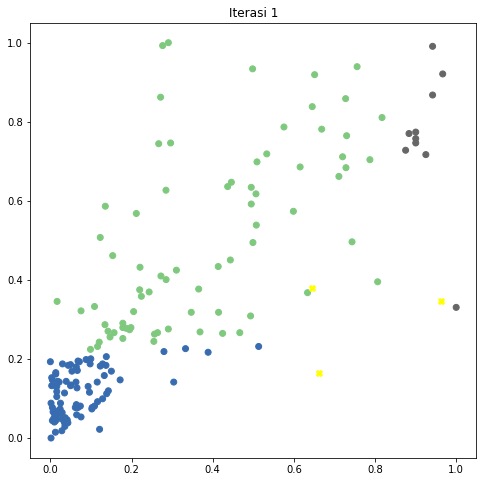

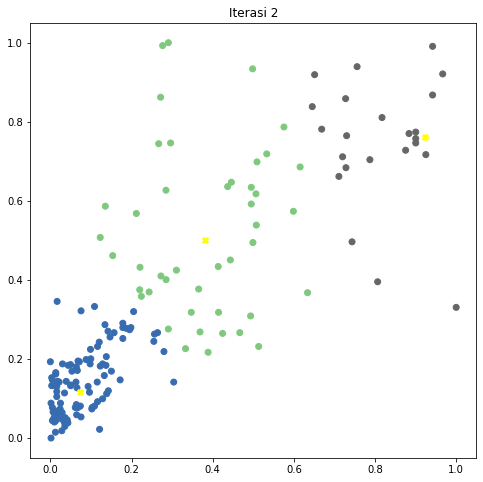

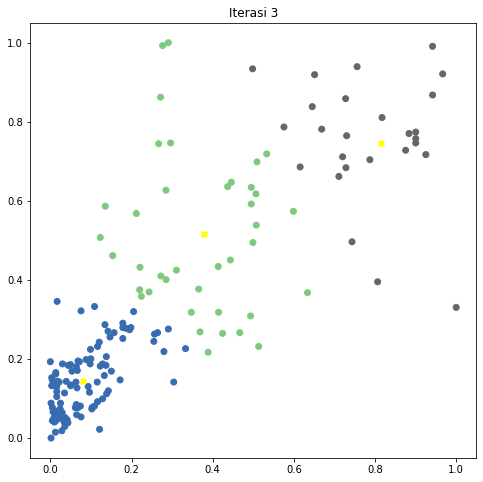

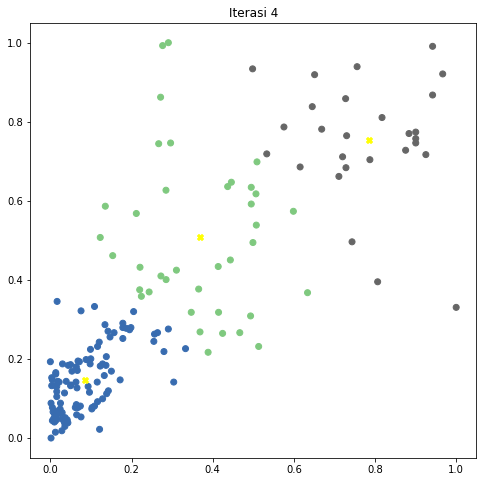

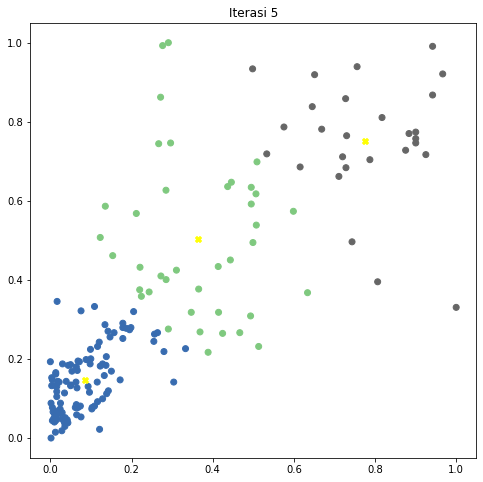

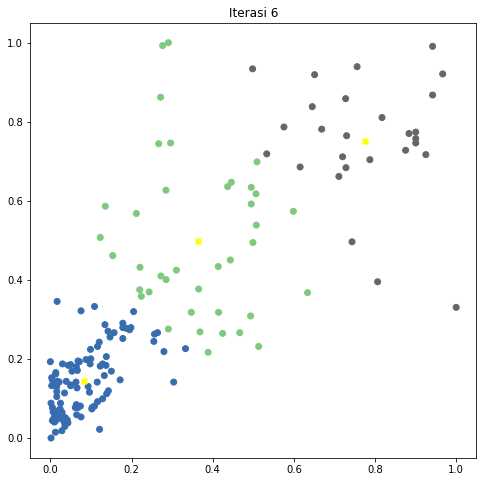

In [133]:
hasilcentroid = kmeans(data_normalize, centroidawal, k = 3, nmax = 100)

In [134]:
hasilcentroid

,0,1
0,0.362715,0.497313
1,0.083550,0.145275
2,0.775963,0.751552


In [135]:
hasilcluster = clustering(data_normalize, hasilcentroid)
hasilcluster

,0
0,2
1,1
2,1
3,2
4,1
...,...
162,0
163,1
164,1
165,0


In [136]:
tabelkelompok = pd.DataFrame(hasilcluster)
result = pd.concat([data_country, tabelkelompok], axis=1, join='inner')
display(result)


,country,0
0,Afghanistan,2
1,Albania,1
2,Algeria,1
3,Angola,2
4,Antigua and Barbuda,1
...,...,...
162,Vanuatu,0
163,Venezuela,1
164,Vietnam,1
165,Yemen,0


In [137]:
#pengelompokan = [[],[],[]]
#i = 0
#while i < len(hasilcluster):
 # pengelompokan[hasilcluster[i][0]].append(country_dict[i])
 # i +=1
#pengelompokan

In [138]:
#listranspose = list(map(list, zip(*pengelompokan)))
#tabelhasil = pd.DataFrame (listranspose)
#tabelhasil